# K delta vector

This notebook contains the instructions to process data taken in the laboratory to compute the delta vector which define the rotation of the field due to the rotation of the K mirror with respect to the center of rotation.

The delta vector connects the center of rotation to the center of the array (spaxel 13, when counting from 1 to 25). In the plots is indicated with a black arrow.

The center of rotation has to be defined in flight since the point source in the lab cannot be repositioned with accuracy.

## Step 1.  Data reduction

The data reduction can be done in bulk by simply calling reduceKVdata with the name of the root directory containing the data.

```
from fifipy.kvector import reduceKVdata
rootdir = '/home/dario/Python/Fifilab/KVectorData/'
reduceKVdata(rootdir)
```

Otherwise specific numbers (contained in the names as KV01 for instance) can be defined to reduce only one set of data.

In [ ]:
from fifipy.kvector import reduceKVdata
rootdir = '/home/dario/Python/Fifilab/KVectorData/'
reduceKVdata(rootdir, names=['15','16','17','18','19','20','21','22','23','24','25','26','27','28'])

## Step 2. Fit source position

A single file can be fitted and visualized with the following instruction.

```
from fifipy.kvector import fitSourcePosition
xc1, yc1 = fitSourcePosition(file, plot=True)
```

To fit all the files relative to a channel and a dichroic position, use these instructions.

```
from fifipy.kvector import fitSourcePositions
rootdir = '/home/dario/Python/Fifilab/KVectorData/'
fitSourcePositions(rootdir,'B','105')
```

The plots show the spaxel centers for the two rotation of the K Mirror.
The dashed connections are the spaxels used for the estimation of centers and rotation.
The black arrow is the connection between the center of rotation and the central spaxel.
The delta vector is this vector once derotated to angle 0.


180000 431000 700000 734000 971000 1249000 1600000 

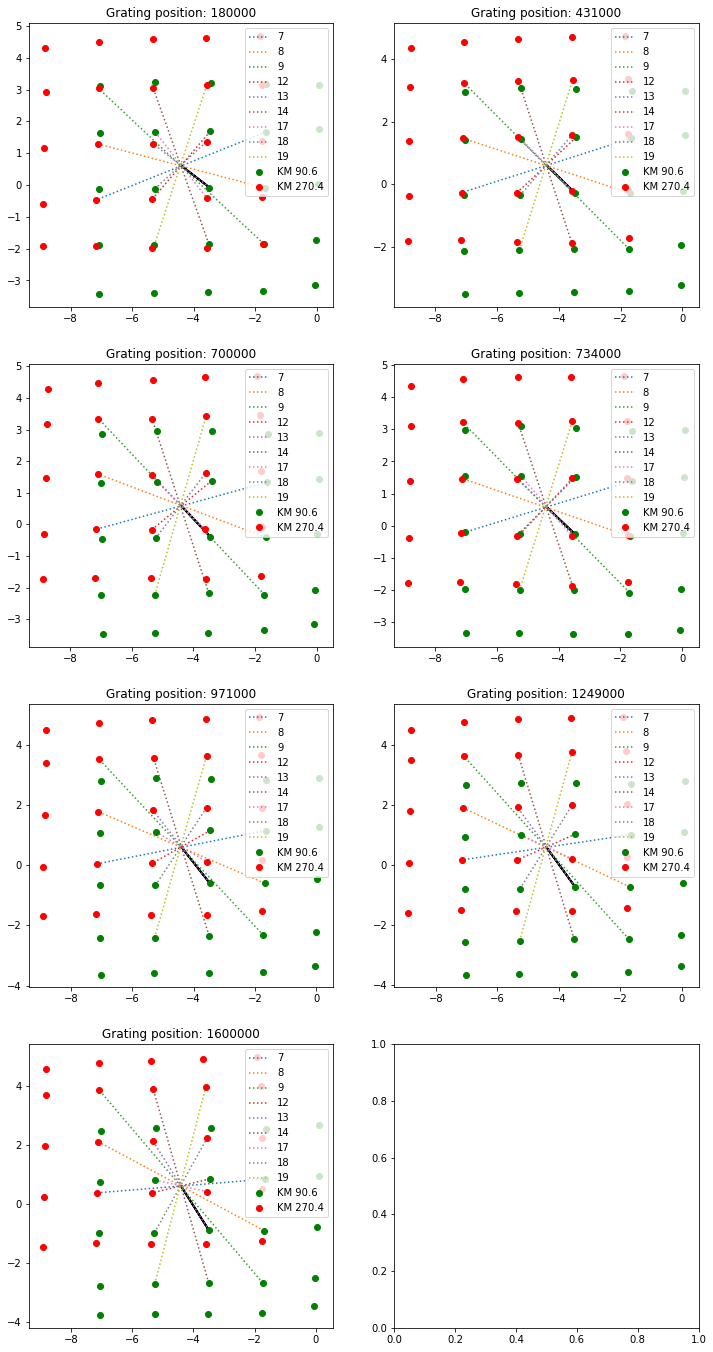

In [4]:
from fifipy.kvector import fitSourcePositions
rootdir = '/home/dario/Python/Fifilab/KVectorData/'
fitSourcePositions(rootdir,'B','105')

180000 431000 734000 971000 1062000 1249000 1600000 

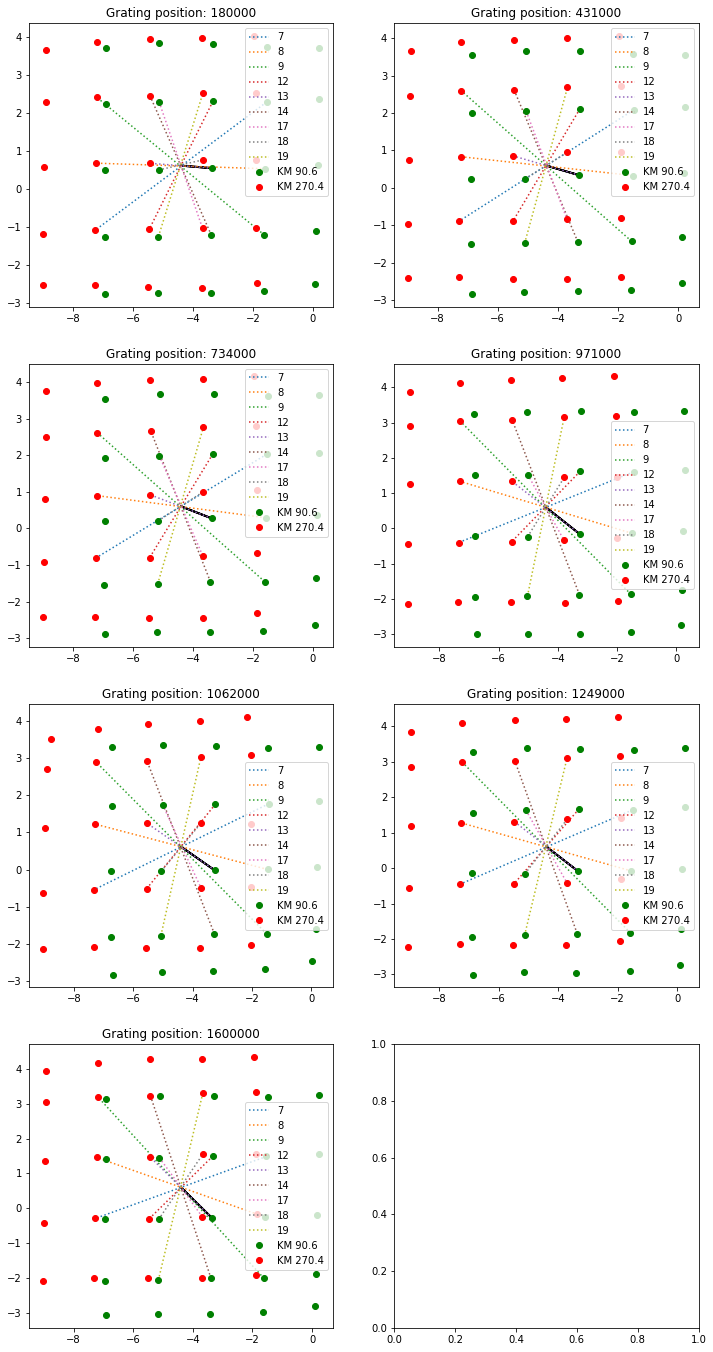

In [5]:
from fifipy.kvector import fitSourcePositions
rootdir = '/home/dario/Python/Fifilab/KVectorData/'
fitSourcePositions(rootdir,'B','130')

267000 640000 754000 822000 902000 1003000 1200000 

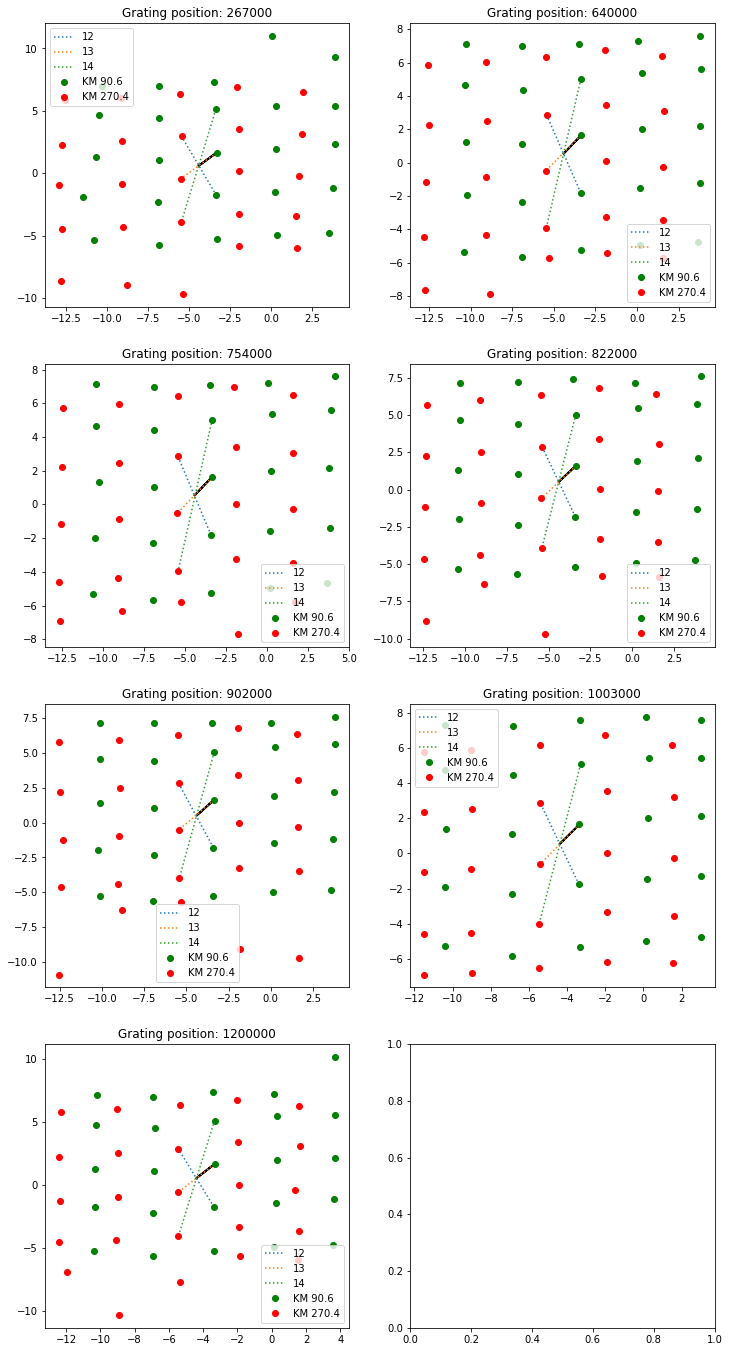

In [6]:
from fifipy.kvector import fitSourcePositions
rootdir = '/home/dario/Python/Fifilab/KVectorData/'
fitSourcePositions(rootdir,'R','105')

400000 640000 754000 822000 902000 1003000 1200000 

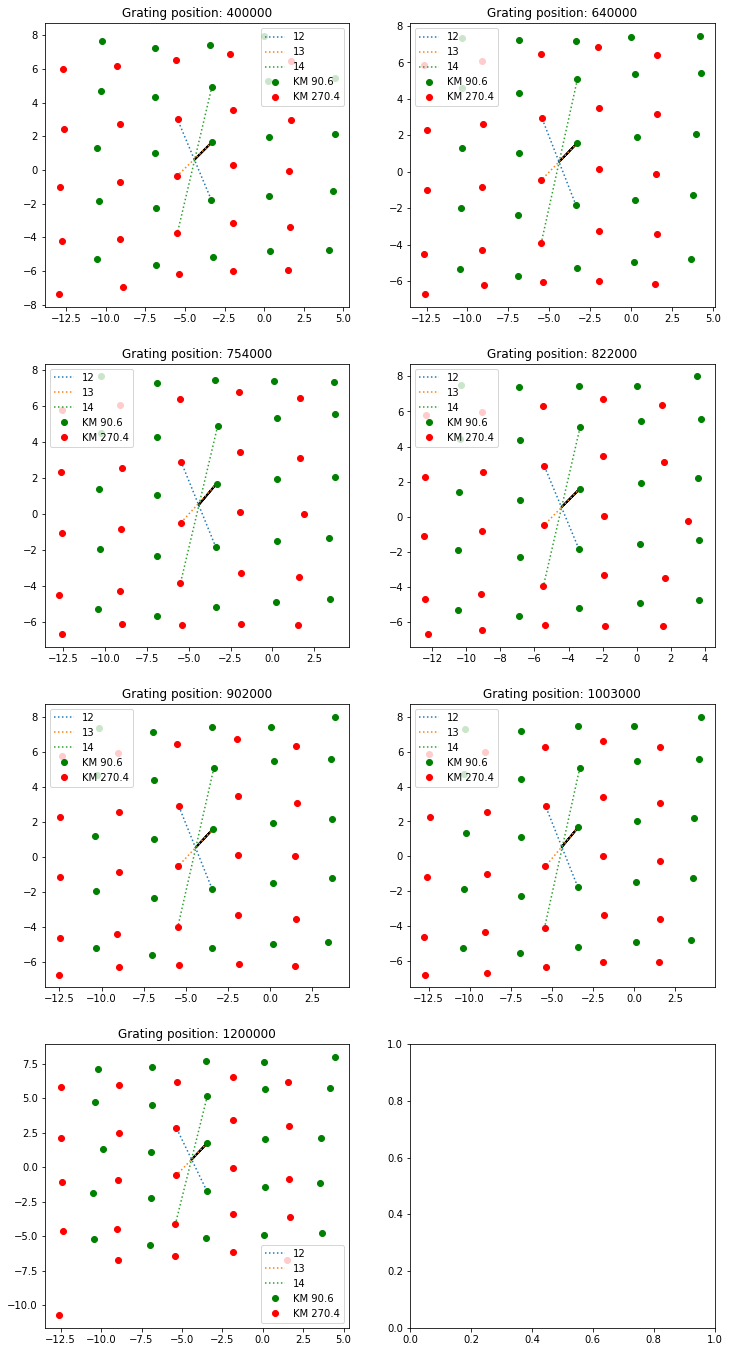

In [7]:
from fifipy.kvector import fitSourcePositions
rootdir = '/home/dario/Python/Fifilab/KVectorData/'
fitSourcePositions(rootdir,'R','130')

## Step 3. Compute the Delta-vectors

In this step the dependency of the delta vectors on the grating position is computed.
Once the length of the delta vector ($R$) and the rotation angle ($\alpha_0$) are computed,
a fit is done to find a linear relationship for the X and Y components of the vector.

K-mirror rotation
command measure
90.584 90.694
90.584 91.120
90.584 91.458
90.584 90.779
90.584 90.759
90.584 90.648
90.584 90.589


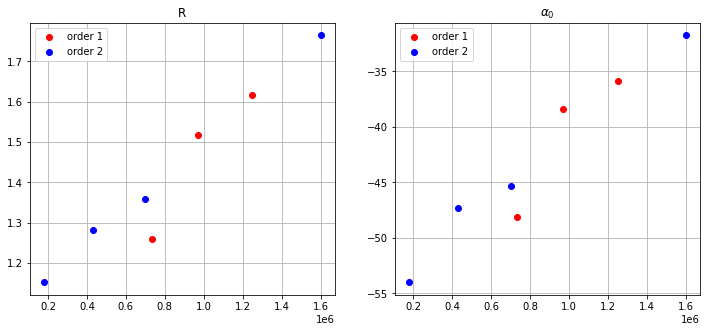

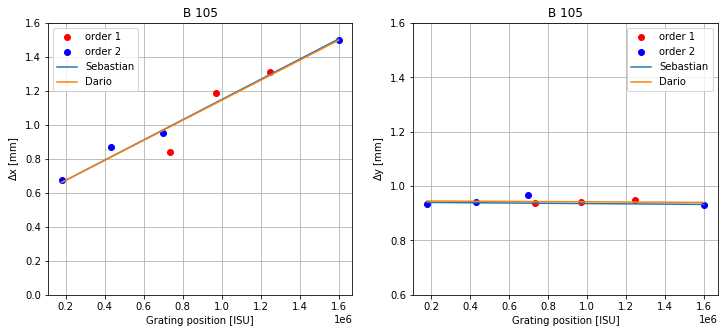

ax 5.8899e-07 ± 6.5389e-08  bx 5.5595e-01 ± 6.2082e-02
ay -3.6357e-09 ± 1.1474e-08  by 9.4575e-01 ± 1.0894e-02

 Date    ch dich   b_x        a_x           Rx_cx(U)       b_y         a_y        Rx_cy(V) 
99999999  b  105   5.5595e-01  5.8899e-07   1.06     9.4575e-01 -3.6357e-09  -0.79
K-mirror rotation
command measure
90.584 90.797
90.584 91.143
90.584 91.258
90.584 90.372
90.584 90.560
90.584 90.955
90.584 90.978


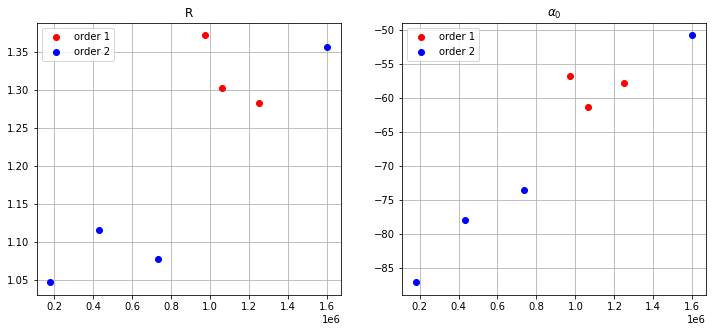

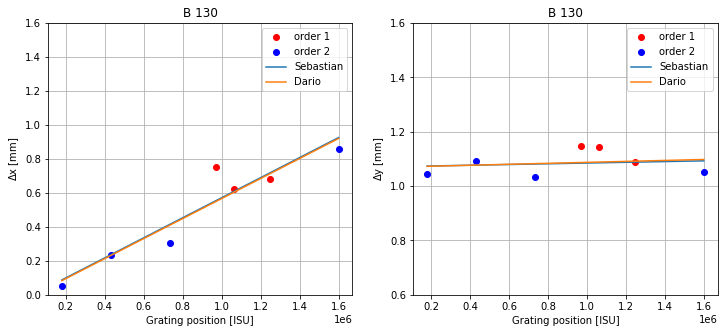

ax 5.8933e-07 ± 9.1018e-08  bx -2.2838e-02 ± 9.0676e-02
ay 1.7779e-08 ± 4.1360e-08  by 1.0695e+00 ± 4.1204e-02

 Date    ch dich   b_x        a_x           Rx_cx(U)       b_y         a_y        Rx_cy(V) 
99999999  b  130  -2.2838e-02  5.8933e-07   0.57     1.0695e+00  1.7779e-08  -0.92
K-mirror rotation
command measure
90.584 89.745
90.584 90.094
90.584 90.610
90.584 90.259
90.584 90.414
90.584 90.722
90.584 90.318


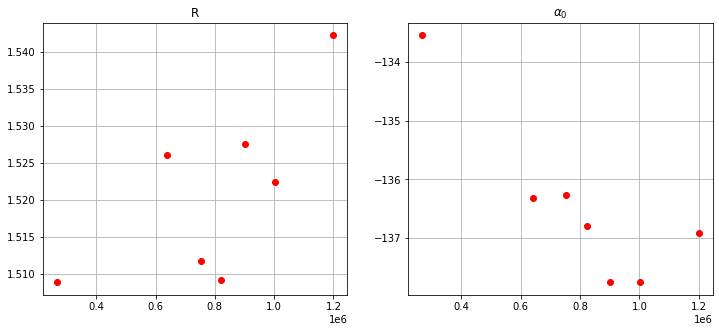

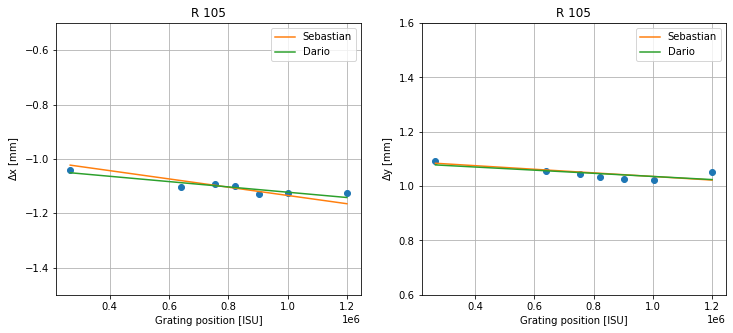

ax -9.7656e-08 ± 1.9986e-08  bx -1.0249e+00 ± 1.6865e-02
ay -5.7841e-08 ± 2.5130e-08  by 1.0933e+00 ± 2.1207e-02

 Date    ch dich   b_x        a_x           Rx_cx(U)       b_y         a_y        Rx_cy(V) 
99999999  r  105  -1.0249e+00 -9.7656e-08  -0.93     1.0933e+00 -5.7841e-08  -0.88
K-mirror rotation
command measure
90.584 90.366
90.584 90.653
90.584 90.844
90.584 90.625
90.584 90.844
90.584 91.089
90.584 90.238


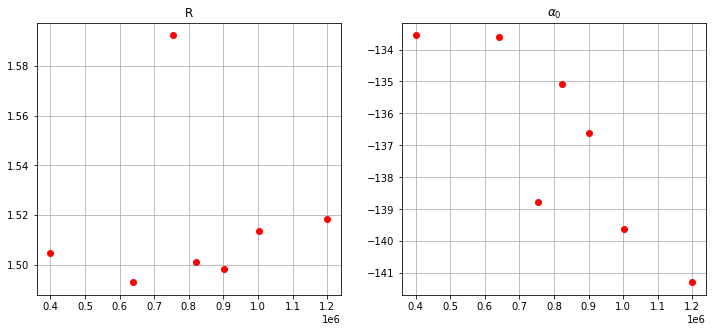

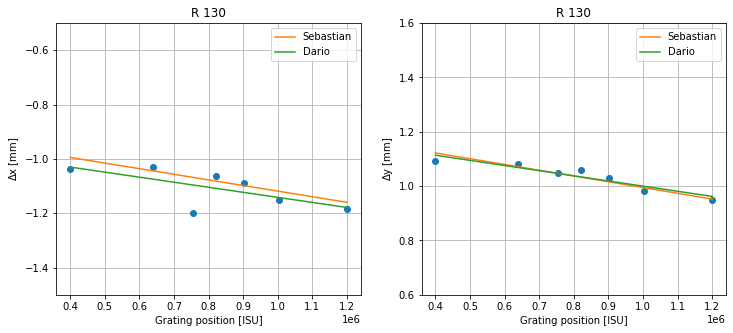

ax -1.8562e-07 ± 8.9293e-08  bx -9.5589e-01 ± 7.6018e-02
ay -1.8937e-07 ± 3.1863e-08  by 1.1893e+00 ± 2.7126e-02

 Date    ch dich   b_x        a_x           Rx_cx(U)       b_y         a_y        Rx_cy(V) 
99999999  r  130  -9.5589e-01 -1.8562e-07  -0.93     1.1893e+00 -1.8937e-07  -0.87


In [1]:
from fifipy.kvector import computeDeltaVector
rootdir = '/home/dario/Python/Fifilab/KVectorData/'
dvector_b105 = computeDeltaVector(rootdir+'B_105.fits')
dvector_b130 = computeDeltaVector(rootdir+'B_130.fits')
dvector_r105 = computeDeltaVector(rootdir+'R_105.fits')
dvector_r130 = computeDeltaVector(rootdir+'R_130.fits')

## Step 4. Save the delta-vectors

Delta-vectors are saved in the format used by the pipeline.
These lines should be added to the 

In [13]:
import os
rootdir = '/home/dario/Python/Fifilab/KVectorData/'
deltaVectors  = [dvector_b105, dvector_b130, dvector_r105, dvector_r130]
with open(os.path.join(rootdir,'DeltaVector_Coeffs.txt'), 'w') as f:
    for DV in deltaVectors:
        f.write(DV+'\n')
        
print('# Date   ch dich   b_x         a_x         Rx_cx(U)  b_y         a_y         Rx_cy(V)')
for DV in deltaVectors:
    print(DV)

# Date   ch dich   b_x         a_x         Rx_cx(U)  b_y         a_y         Rx_cy(V)
99999999  b  105   5.5595e-01  5.8899e-07   1.06     9.4575e-01 -3.6357e-09  -0.79
99999999  b  130  -2.2838e-02  5.8933e-07   0.57     1.0695e+00  1.7779e-08  -0.92
99999999  r  105  -1.0249e+00 -9.7656e-08  -0.93     1.0933e+00 -5.7841e-08  -0.88
99999999  r  130  -9.5589e-01 -1.8562e-07  -0.93     1.1893e+00 -1.8937e-07  -0.87
